In [8]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = 16, 10

# Read in data and do basic massaging

In [9]:
df_us_raw = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
df_us_raw.head(2)

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,3/19/20,3/20/20,3/21/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20
0,84000001,US,USA,840,1.0,Unassigned,Alabama,US,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,84000002,US,USA,840,2.0,Unassigned,Alaska,US,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


In [10]:
df_global_raw = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df_global_raw.head(2)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,24,40,40,74,84,94,110,110,120,170
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,76,89,104,123,146,174,186,197,212,223


In [11]:
print(df_us_raw.columns)
print(df_global_raw.columns)

Index(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_', 'Combined_Key', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20', '3/27/20',
       '3/28/20', '3/29/20'],
      dtype='object')
Index(['Province/State', 'Country/Region', 'Lat',

In [26]:
df_global_raw = df_global_raw.rename(columns={'Province/State': 'Province_State', 
                                             'Country/Region': 'Country_Region',
                                             'Long': 'Long_'})
df_global_raw['Combined_Key'] = df_global_raw.Province_State.astype(str).str.cat(df_global_raw.Country_Region.astype(str), sep=', ', na_rep='')
    

df_raw = df_us_raw.append(df_global_raw)
df_raw

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,3/21/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/22/20,3/30/20
0,84000001.0,US,USA,840.0,1.0,Unassigned,Alabama,US,NaN,NaN,...,0,0,0,0,0,0,0,0,NaN,NaN
1,84000002.0,US,USA,840.0,2.0,Unassigned,Alaska,US,NaN,NaN,...,0,0,0,0,0,0,0,0,NaN,NaN
2,84000004.0,US,USA,840.0,4.0,Unassigned,Arizona,US,NaN,NaN,...,0,0,0,0,0,0,0,0,NaN,NaN
3,84000005.0,US,USA,840.0,5.0,Unassigned,Arkansas,US,NaN,NaN,...,118,3,13,20,24,35,32,31,NaN,NaN
4,84000006.0,US,USA,840.0,6.0,Unassigned,California,US,NaN,NaN,...,0,0,0,0,0,12,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,NaN,NaN,NaN,NaN,NaN,NaN,Anguilla,United Kingdom,18.2206,-63.0686,...,0,0,0,0,0,0,2,2,0.0,2.0
250,NaN,NaN,NaN,NaN,NaN,NaN,British Virgin Islands,United Kingdom,18.4207,-64.6400,...,0,0,0,0,0,0,2,2,0.0,2.0
251,NaN,NaN,NaN,NaN,NaN,NaN,Turks and Caicos Islands,United Kingdom,21.6940,-71.7979,...,0,0,0,0,0,0,4,4,0.0,5.0
252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MS Zaandam,0.0000,0.0000,...,0,0,0,0,0,0,2,2,0.0,2.0


In [27]:
df_raw.columns

Index(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_', 'Combined_Key', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20', '3/27/20',
       '3/28/20', '3/29/20', '3/22/20', '3/30/20'],
      dtype='object')

In [19]:
df_raw['Country_Region'].unique()

array(['US', 'Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Diamond Princess', 'Cuba', 'Cyprus',
       'Czechia', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary',
       'Iceland', 

In [20]:
df_raw['Province_State'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'Diamond Princess',
       'Grand Princess', 'American Samoa', 'Guam',
       'Northern Mariana Islands', 'Puerto Rico', 'Virgin Islands',
       'Recovered', nan, 'Australian Capital Territory',
       'New South Wales', 'Northern Territory', 'Queensland',
       'South Austr

In [21]:
df1 = df_raw.melt(id_vars=df_raw.columns[0:11], var_name='Date', value_name='Confirmed')
df1 = df1.set_index('Date')
df1

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Confirmed
Date,,,,,,,,,,,,
1/22/20,84000001.0,US,USA,840.0,1.0,Unassigned,Alabama,US,NaN,NaN,"Unassigned, Alabama, US",0.0
1/22/20,84000002.0,US,USA,840.0,2.0,Unassigned,Alaska,US,NaN,NaN,"Unassigned, Alaska, US",0.0
1/22/20,84000004.0,US,USA,840.0,4.0,Unassigned,Arizona,US,NaN,NaN,"Unassigned, Arizona, US",0.0
1/22/20,84000005.0,US,USA,840.0,5.0,Unassigned,Arkansas,US,NaN,NaN,"Unassigned, Arkansas, US",0.0
1/22/20,84000006.0,US,USA,840.0,6.0,Unassigned,California,US,NaN,NaN,"Unassigned, California, US",0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3/30/20,NaN,NaN,NaN,NaN,NaN,NaN,Anguilla,United Kingdom,18.2206,-63.0686,"Anguilla, United Kingdom",2.0
3/30/20,NaN,NaN,NaN,NaN,NaN,NaN,British Virgin Islands,United Kingdom,18.4207,-64.6400,"British Virgin Islands, United Kingdom",2.0
3/30/20,NaN,NaN,NaN,NaN,NaN,NaN,Turks and Caicos Islands,United Kingdom,21.6940,-71.7979,"Turks and Caicos Islands, United Kingdom",5.0


In [28]:
df2 = df_raw.melt(id_vars='Combined_Key', value_vars=df_raw.columns[11:], var_name='Date', value_name='Confirmed')
df2 = df2.set_index('Date')
df = df2
df

,Combined_Key,Confirmed
Date,,
1/22/20,"Unassigned, Alabama, US",0.0
1/22/20,"Unassigned, Alaska, US",0.0
1/22/20,"Unassigned, Arizona, US",0.0
1/22/20,"Unassigned, Arkansas, US",0.0
1/22/20,"Unassigned, California, US",0.0
...,...,...
3/30/20,"Anguilla, United Kingdom",2.0
3/30/20,"British Virgin Islands, United Kingdom",2.0
3/30/20,"Turks and Caicos Islands, United Kingdom",5.0


# Narrow down to a set of interesting States and Counties and graph

In [29]:
rowsofinterest = df['Combined_Key'].isin(['Santa Clara, California, US', 'New York City, New York, US', 'Salt Lake, Utah, US'])
df.loc[rowsofinterest,:]

,Combined_Key,Confirmed
Date,,
1/22/20,"Santa Clara, California, US",0.0
1/22/20,"New York City, New York, US",0.0
1/22/20,"Salt Lake, Utah, US",0.0
1/23/20,"Santa Clara, California, US",0.0
1/23/20,"New York City, New York, US",0.0
...,...,...
3/22/20,"New York City, New York, US",NaN
3/22/20,"Salt Lake, Utah, US",NaN
3/30/20,"Santa Clara, California, US",NaN


In [30]:
rowsofinterest = df['Combined_Key'].str.endswith('California, US')
df.loc[rowsofinterest,:]

,Combined_Key,Confirmed
Date,,
1/22/20,"Unassigned, California, US",0.0
1/22/20,"Alameda, California, US",0.0
1/22/20,"Alpine, California, US",0.0
1/22/20,"Amador, California, US",0.0
1/22/20,"Butte, California, US",0.0
...,...,...
3/30/20,"Tulare, California, US",NaN
3/30/20,"Tuolumne, California, US",NaN
3/30/20,"Ventura, California, US",NaN


In [47]:
df.groupby(level=0)['Confirmed'].sum()
df['Combined_Key'].str.endswith('California, US')

Date
1/22/20    False
1/22/20    False
1/22/20    False
1/22/20    False
1/22/20     True
           ...  
3/30/20    False
3/30/20    False
3/30/20    False
3/30/20    False
3/30/20    False
Name: Combined_Key, Length: 238740, dtype: bool

In [53]:
newdf = pd.DataFrame(index = df.index.unique(),
                     data = {
                         'California': df.loc[df['Combined_Key'].str.endswith('California, US'),'Confirmed'].groupby(level=0).sum(),
                         'New York': df.loc[df['Combined_Key'].str.endswith('New York, US'),'Confirmed'].groupby(level=0).sum(),
                         'Santa Clara': df.loc[df['Combined_Key']=='Santa Clara, California, US', 'Confirmed'].groupby(level=0).sum(),
                     }

)

newdf

,California,New York,Santa Clara
Date,,,
1/22/20,0.0,0.0,0.0
1/23/20,0.0,0.0,0.0
1/24/20,0.0,0.0,0.0
1/25/20,0.0,0.0,0.0
1/26/20,2.0,0.0,0.0
...,...,...,...
3/27/20,4657.0,44876.0,574.0
3/28/20,5095.0,52410.0,591.0
3/29/20,5852.0,59648.0,646.0


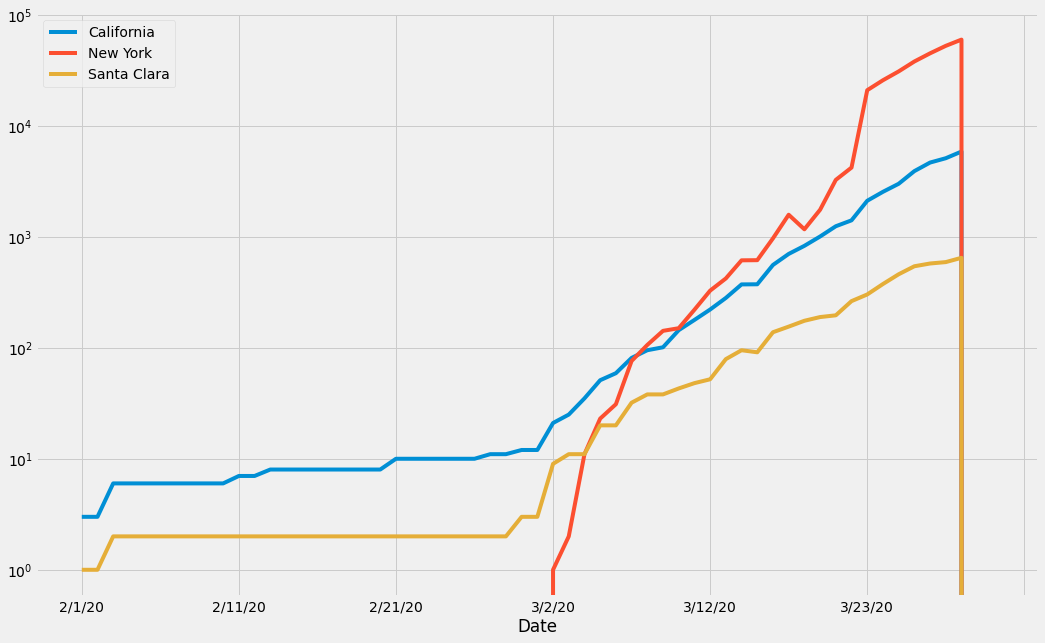

In [54]:
newdf.loc['2/1/20':,:].plot(logy=True)

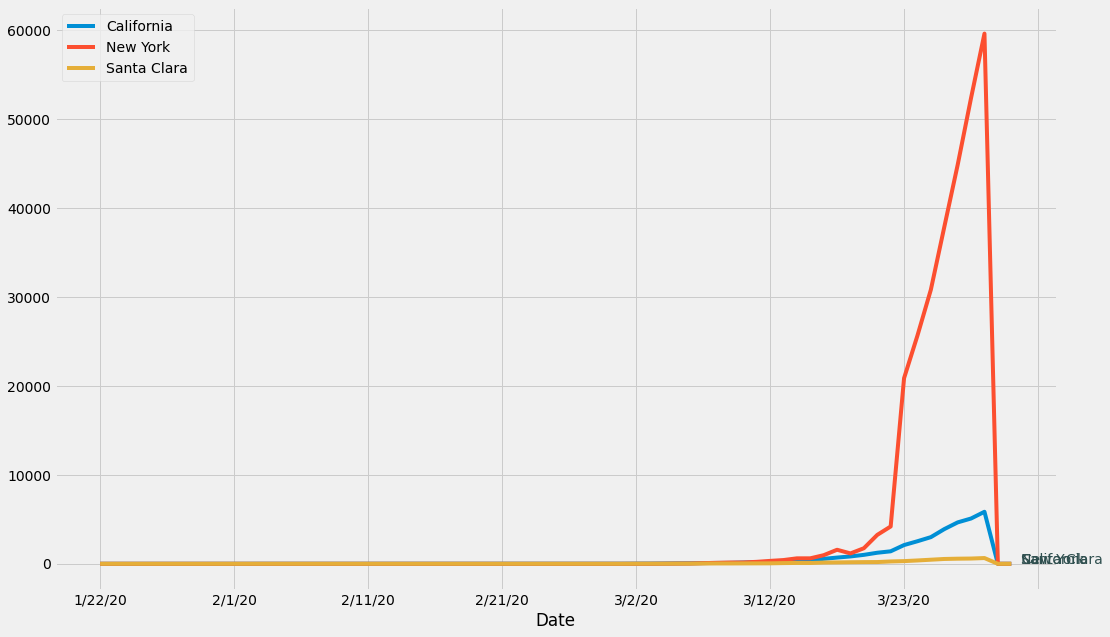

In [57]:
def label_lines(df, ax):
    for label in df.columns:
        previous = df.index[0]
        for xdays, datapoint in enumerate(df[label]):
            if pd.isnull(datapoint) or (xdays == len(df[label])-1):
                ax.annotate(label, (xdays, previous), 
                            xytext=(10,0), 
                            textcoords='offset pixels',
                            family='sans-serif', fontsize=14, color='darkslategrey')
                break
            else:
                previous = datapoint

graph_data = newdf
#graph_data = newdf.drop('China', axis=1).loc['2/21/20':,:]
ax = graph_data.plot()
label_lines(graph_data, ax)
plt.show()

In [8]:
popdf = pd.DataFrame(index = df.index,
                     data = {
                         'Japan': 126476461,
                         'United States': 331002651,
                         'Singapore': 5850342,
                         'Italy': 60461826,
                         'Iran': 83992949,
                         'France': 65273511,
                         'Spain': 46754778,
                         'Germany': 83783942,
                         'Switzerland': 8654622,
                         'United Kingdom': 67886011,
                         'South Korea': 51269185,
                         'Taiwan': 23816775,
                         'Philippines': 109581078,
                         'Ireland': 4937786,
                         'California': 39747267,
                         'New York': 19491339,
                         'Utah': 3282115,
                         'Hawaii': 1412687,
                         'Washington': 7797095,
                         'China': 1439323776,
                     }

)
popdf

casesper100kdf = newdf.div(popdf).mul(100000)
casesper100kdf.loc['3/14/20':'3/15/20',:]

,California,China,France,Germany,Hawaii,Iran,Ireland,Italy,Japan,New York,Philippines,Singapore,South Korea,Spain,Switzerland,Taiwan,United Kingdom,United States,Utah,Washington
3/14/20,0.855405,5.626045,6.874151,5.472409,0.283148,15.154844,2.612507,34.992327,0.611181,2.693504,0.101295,3.623720,15.771657,13.669191,15.702592,0.222532,1.685178,0.823860,0.304682,7.336066
3/15/20,1.071772,5.627851,6.929304,6.916600,0.424723,16.594250,2.612507,40.929958,0.663365,3.755514,0.127759,3.863022,15.919894,16.678509,25.419943,0.247725,1.686651,1.057091,0.853108,8.246661


# Create a 'days since 100 cases' graph

In [9]:
newdf.head(2)

,Japan,United States,Singapore,Italy,Iran,France,Spain,Germany,Switzerland,United Kingdom,South Korea,Taiwan,Philippines,Ireland,China,California,New York,Washington,Utah,Hawaii
1/22/20,2,1,0,0,0,0,0,0,0,0,1,1,0,0,548,0,0,1,0,0
1/23/20,1,1,1,0,0,0,0,0,0,0,1,1,0,0,643,0,0,1,0,0


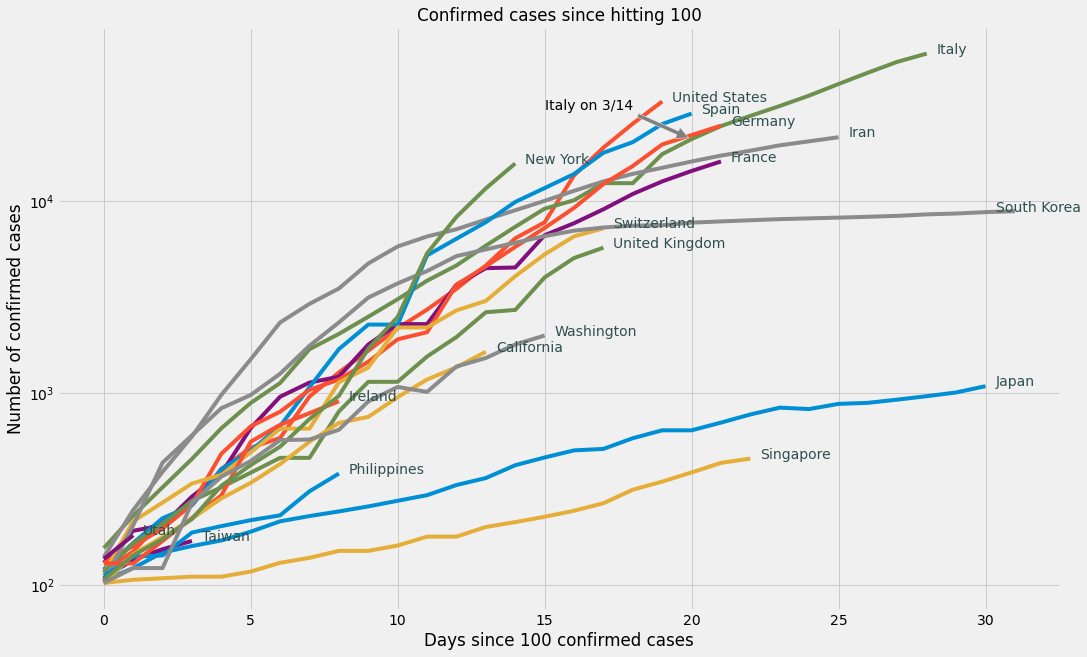

In [10]:
threshold = 100
daysSince100 = pd.DataFrame(index=range(0,len(newdf.index)))
for location in newdf.columns:
    # create list of data once above 'threshold'
    tempList = [newdf.loc[date, location] 
                              for date in newdf[location].index 
                              if newdf.loc[date, location] > threshold]
    if (not tempList) or (tempList[-1] <= threshold):
        continue
    # put that list in another list that has NaN's buffered out to length of the DataFrame
    tempListFilled = list()
    for index, _ in enumerate(daysSince100.index):
        if index < len(tempList):
            tempListFilled.append(tempList[index])
        else:
            tempListFilled.append(np.NaN)
    # add the buffered list to the dataframe as a new column
    daysSince100[location] = tempListFilled

daysSince100 = daysSince100.drop('China', axis=1)
daysSince100 = daysSince100.dropna(axis=0, how='all')
ax = daysSince100.plot(logy=True, legend=False)
#ax.set_yscale('log', basey=2)
ax.set_title('Confirmed cases since hitting {}'.format(threshold), fontsize='large')
ax.set_xlabel('Days since {} confirmed cases'.format(threshold), fontsize='large')
ax.set_ylabel('Number of confirmed cases', fontsize='large')
ax.annotate("Italy on 3/14", xy=(20,21157), xytext=(15, 30000),
            arrowprops=dict(facecolor='grey', shrink=0.05),)


for location in daysSince100.columns:
    previous = 100
    for xdays, datapoint in enumerate(daysSince100[location]):
        if pd.isnull(datapoint) or (xdays == len(daysSince100[location])-1):
            ax.annotate(location, (xdays-1, previous), 
                        xytext=(10,0), 
                        textcoords='offset pixels',
                        family='sans-serif', fontsize=14, color='darkslategrey')
            break
        else:
            previous = datapoint
            
#ax.hlines(60461826, 0, 50, linestyles='dotted', label='Pop of Italy')
plt.show()
        

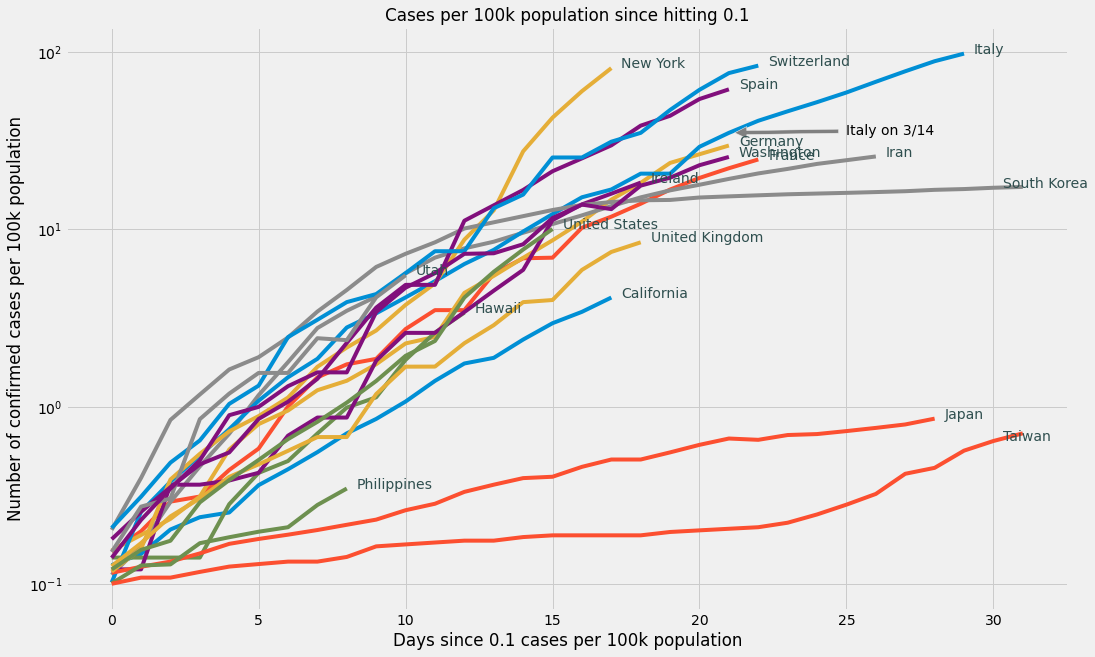

In [11]:
threshold = .1
daysSincerate = pd.DataFrame(index=range(0,len(casesper100kdf.index)))
for location in casesper100kdf.columns:
    # create list of data once above 'threshold'
    tempList = [casesper100kdf.loc[date, location] 
                              for date in casesper100kdf[location].index 
                              if casesper100kdf.loc[date, location] > threshold]
    if (not tempList) or (tempList[-1] <= threshold):
        continue
    # put that list in another list that has NaN's buffered out to length of the DataFrame
    tempListFilled = list()
    for index, _ in enumerate(daysSincerate.index):
        if index < len(tempList):
            tempListFilled.append(tempList[index])
        else:
            tempListFilled.append(np.NaN)
    # add the buffered list to the dataframe as a new column
    daysSincerate[location] = tempListFilled


daysSincerate = daysSincerate.drop(['China', 'Singapore'], axis=1)
daysSincerate = daysSincerate.dropna(axis=0, how='all')
ax = daysSincerate.plot(logy=True, legend=False)
#ax.set_yscale('log', basey=2)
ax.set_title('Cases per 100k population since hitting {}'.format(threshold), fontsize='large')
ax.set_xlabel('Days since 0.1 cases per 100k population', fontsize='large')
ax.set_ylabel('Number of confirmed cases per 100k population', fontsize='large')
ax.annotate("Italy on 3/14", xy=(21,34.99), xytext=(25, 34),
            arrowprops=dict(facecolor='grey', shrink=0.05),)

for location in daysSincerate.columns:
    previous = 100
    for xdays, datapoint in enumerate(daysSincerate[location]):
        if pd.isnull(datapoint) or (xdays == len(daysSincerate[location])-1):
            ax.annotate(location, (xdays-1, previous), 
                        xytext=(10,0), 
                        textcoords='offset pixels',
                        family='sans-serif', fontsize=14, color='darkslategrey')
            break
        else:
            previous = datapoint
plt.show()
        

In [12]:
daysSince100

,Japan,United States,Singapore,Italy,Iran,France,Spain,Germany,Switzerland,United Kingdom,South Korea,Taiwan,Philippines,Ireland,California,New York,Washington,Utah
0,105.0,118.0,102.0,155.0,139.0,130.0,120.0,130.0,114.0,116.0,104.0,108.0,111.0,129.0,101.0,106.0,102.0,136.0
1,122.0,149.0,106.0,229.0,245.0,191.0,165.0,159.0,214.0,164.0,204.0,135.0,140.0,129.0,144.0,142.0,122.0,181.0
2,147.0,217.0,108.0,322.0,388.0,204.0,222.0,196.0,268.0,207.0,433.0,153.0,142.0,169.0,177.0,173.0,122.0,NaN
3,159.0,262.0,110.0,453.0,593.0,288.0,259.0,262.0,337.0,274.0,602.0,169.0,187.0,223.0,221.0,220.0,267.0,NaN
4,170.0,402.0,110.0,655.0,978.0,380.0,400.0,482.0,374.0,322.0,833.0,NaN,202.0,292.0,282.0,328.0,366.0,NaN
5,189.0,518.0,117.0,888.0,1501.0,656.0,500.0,670.0,491.0,384.0,977.0,NaN,217.0,557.0,340.0,421.0,442.0,NaN
6,214.0,583.0,130.0,1128.0,2336.0,957.0,673.0,799.0,652.0,459.0,1261.0,NaN,230.0,683.0,426.0,525.0,568.0,NaN
7,228.0,959.0,138.0,1694.0,2922.0,1134.0,1073.0,1040.0,652.0,459.0,1766.0,NaN,307.0,785.0,557.0,732.0,572.0,NaN
8,241.0,1281.0,150.0,2036.0,3513.0,1217.0,1695.0,1176.0,1139.0,802.0,2337.0,NaN,380.0,906.0,698.0,967.0,643.0,NaN
9,256.0,1663.0,150.0,2502.0,4747.0,1792.0,2277.0,1457.0,1359.0,1144.0,3150.0,NaN,NaN,NaN,751.0,1706.0,904.0,NaN


# Look at growth factor changes

In [13]:
start_date = '2/27/20'
window = 3
location = ['California', 'Italy']
#location = ['California', 'South Korea', 'Italy', 'Germany', 'New York']
newdf.loc[start_date:,:]

,Japan,United States,Singapore,Italy,Iran,France,Spain,Germany,Switzerland,United Kingdom,South Korea,Taiwan,Philippines,Ireland,China,California,New York,Washington,Utah,Hawaii
2/27/20,214,58,93,655,245,38,15,46,8,15,1766,32,3,0,78600,11,0,1,0,0
2/28/20,228,60,93,888,388,57,32,48,8,20,2337,34,3,0,78928,11,0,1,0,0
2/29/20,241,68,102,1128,593,100,45,79,18,23,3150,39,3,1,79356,12,0,7,0,0
3/1/20,256,74,106,1694,978,130,84,130,27,36,3736,40,3,1,79932,12,0,11,0,0
3/2/20,274,98,108,2036,1501,191,120,159,42,40,4335,41,3,1,80136,21,1,18,0,0
3/3/20,293,118,110,2502,2336,204,165,196,56,51,5186,42,3,2,80261,25,2,27,0,0
3/4/20,331,149,110,3089,2922,288,222,262,90,86,5621,42,3,6,80386,35,11,39,0,0
3/5/20,360,217,117,3858,3513,380,259,482,114,116,6088,44,3,6,80537,51,23,70,0,0
3/6/20,420,262,130,4636,4747,656,400,670,214,164,6593,45,5,18,80690,59,31,78,0,0
3/7/20,461,402,138,5883,5823,957,500,799,268,207,7041,45,6,18,80770,81,76,102,0,0


In [14]:
# calculate growth factor (diff between 2 points divided by the diff between the prior 2 points)
newdf.loc[start_date:,:].diff().pct_change().add(1)

,Japan,United States,Singapore,Italy,Iran,France,Spain,Germany,Switzerland,United Kingdom,South Korea,Taiwan,Philippines,Ireland,China,California,New York,Washington,Utah,Hawaii
2/27/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2/28/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2/29/20,0.928571,4.000000,inf,1.030043,1.433566,2.263158,0.764706,15.500000,inf,0.600000,1.423818,2.500000,NaN,inf,1.304878,inf,NaN,inf,NaN,NaN
3/1/20,1.153846,0.750000,0.444444,2.358333,1.878049,0.697674,3.000000,1.645161,0.900000,4.333333,0.720787,0.200000,NaN,0.000000,1.345794,0.000000,NaN,0.666667,NaN,NaN
3/2/20,1.200000,4.000000,0.500000,0.604240,1.358442,2.033333,0.923077,0.568627,1.666667,0.307692,1.022184,1.000000,NaN,NaN,0.354167,inf,inf,1.750000,NaN,NaN
3/3/20,1.055556,0.833333,1.000000,1.362573,1.596558,0.213115,1.250000,1.275862,0.933333,2.750000,1.420701,1.000000,NaN,inf,0.612745,0.444444,1.000000,1.285714,NaN,NaN
3/4/20,2.000000,1.550000,0.000000,1.259657,0.701796,6.461538,1.266667,1.783784,2.428571,3.181818,0.511163,0.000000,NaN,4.000000,1.000000,2.500000,9.000000,1.333333,NaN,NaN
3/5/20,0.763158,2.193548,inf,1.310051,1.008532,1.095238,0.649123,3.333333,0.705882,0.857143,1.073563,inf,NaN,0.000000,1.208000,1.600000,1.333333,2.583333,NaN,NaN
3/6/20,2.068966,0.661765,1.857143,1.011704,2.087986,3.000000,3.810811,0.854545,4.166667,1.600000,1.081370,0.500000,inf,inf,1.013245,0.500000,0.666667,0.258065,NaN,NaN
3/7/20,0.683333,3.111111,0.615385,1.602828,0.871961,1.090580,0.709220,0.686170,0.540000,0.895833,0.887129,0.000000,0.500000,0.000000,0.522876,2.750000,5.625000,3.000000,NaN,NaN


In [15]:
# Many countries didn't update their reports on 3/12 leading to 'inf' growth
# factor on 3/13.  I'm going to drop 3/12 data to get a better trend
tempdf = newdf.drop('3/12/20', axis='index')
tempdf.loc[start_date:,:].diff().pct_change().add(1)

,Japan,United States,Singapore,Italy,Iran,France,Spain,Germany,Switzerland,United Kingdom,South Korea,Taiwan,Philippines,Ireland,China,California,New York,Washington,Utah,Hawaii
2/27/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2/28/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2/29/20,0.928571,4.000000,inf,1.030043,1.433566,2.263158,0.764706,15.500000,inf,0.600000,1.423818,2.500000,NaN,inf,1.304878,inf,NaN,inf,NaN,NaN
3/1/20,1.153846,0.750000,0.444444,2.358333,1.878049,0.697674,3.000000,1.645161,0.900000,4.333333,0.720787,0.200000,NaN,0.000000,1.345794,0.000000,NaN,0.666667,NaN,NaN
3/2/20,1.200000,4.000000,0.500000,0.604240,1.358442,2.033333,0.923077,0.568627,1.666667,0.307692,1.022184,1.000000,NaN,NaN,0.354167,inf,inf,1.750000,NaN,NaN
3/3/20,1.055556,0.833333,1.000000,1.362573,1.596558,0.213115,1.250000,1.275862,0.933333,2.750000,1.420701,1.000000,NaN,inf,0.612745,0.444444,1.000000,1.285714,NaN,NaN
3/4/20,2.000000,1.550000,0.000000,1.259657,0.701796,6.461538,1.266667,1.783784,2.428571,3.181818,0.511163,0.000000,NaN,4.000000,1.000000,2.500000,9.000000,1.333333,NaN,NaN
3/5/20,0.763158,2.193548,inf,1.310051,1.008532,1.095238,0.649123,3.333333,0.705882,0.857143,1.073563,inf,NaN,0.000000,1.208000,1.600000,1.333333,2.583333,NaN,NaN
3/6/20,2.068966,0.661765,1.857143,1.011704,2.087986,3.000000,3.810811,0.854545,4.166667,1.600000,1.081370,0.500000,inf,inf,1.013245,0.500000,0.666667,0.258065,NaN,NaN
3/7/20,0.683333,3.111111,0.615385,1.602828,0.871961,1.090580,0.709220,0.686170,0.540000,0.895833,0.887129,0.000000,0.500000,0.000000,0.522876,2.750000,5.625000,3.000000,NaN,NaN


Text(0.5, 1.0, 'Confirmed Cases Growth Factor\n(Daily change in confirmed cases divided by previous daily change)\n(3 day moving average)')

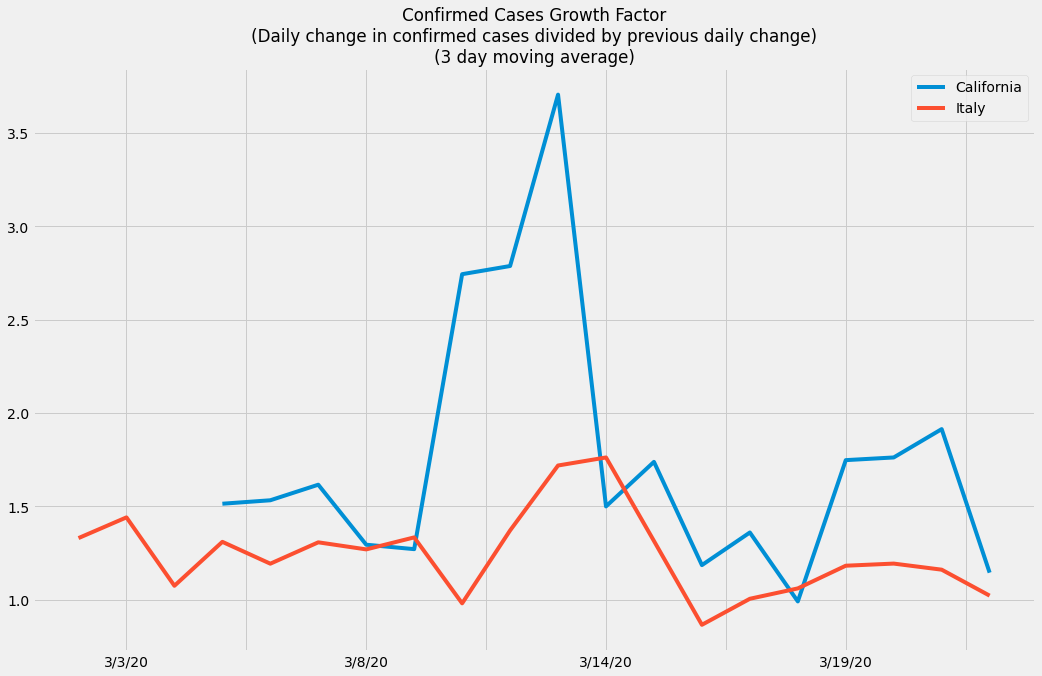

In [16]:
# graph the growth factors
ax = tempdf.loc[start_date:,location].diff().pct_change().add(1).rolling(window).mean().plot()
#ax.set_ylim(ymin=0, ymax=4)
ax.set_title("Confirmed Cases Growth Factor\n(Daily change in confirmed cases divided by previous daily change)\n({} day moving average)".format(window), fontsize='large')